In [1]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
# versions
import matplotlib
import scipy
print('numpy: ',np.__version__)
print('pandas: ',pd.__version__)
print('seaborn', sns.__version__)
print('matplotlib: ',matplotlib.__version__)
print('scipy: ',scipy.__version__)

numpy:  1.16.1
pandas:  0.24.0
seaborn 0.9.0
matplotlib:  3.0.2
scipy:  1.2.0


In [3]:
def dice(sides,rolls):
    roll = lambda sides: random.randint(1,sides+1)
    n_rolls = [roll(sides) for i in range(rolls)]
    return n_rolls

In [4]:
dice(10,10)

[10, 1, 1, 4, 1, 10, 6, 8, 2, 8]

In [5]:
def roll_n_keep(sides,rolls,keep):
    result = dice(sides,rolls)[:keep]
    result_sum = sum(result)
    return result

In [6]:
roll_n_keep(10,5,3)

[5, 2, 6]

In [7]:
def final_roll(sides,rolls,keep,explode,explode_value=10):
    if explode == False:
        x = roll_n_keep(sides,rolls,keep)
    while explode:
        x = roll_n_keep(sides,rolls,keep)
        n_x = x.count(explode_value)
        while n_x:
            ex_x= roll_n_keep(sides,min(n_x,keep),min(n_x,keep))
            n_x = ex_x.count(explode_value)
            x = x + ex_x
            if n_x == 0:
                explode=False
        if n_x == 0:
                explode=False
    return sum(x)

In [8]:
final_roll(10,5,3,True)

23

In [9]:
def roll_dist(sides,rolls,keep,explode,explode_value,n_tries):
    data = []
    for i in range(n_tries):
        data += [final_roll(sides,rolls,keep,explode)]
    return data

In [10]:
data = roll_dist(10,5,3,True,10,10)

In [11]:
data

[13, 17, 10, 12, 17, 19, 16, 20, 15, 10]

In [12]:
data.count(10)

2

In [20]:
def plot_roll(sides,rolls,keep,n_tries,save):
    data = roll_dist(sides,rolls,keep,True,10,n_tries)
    mean = np.round(np.mean(data),1)
    median = np.round(np.median(data),1)
    moda = stats.mode(data)[0][0]
    line_max = data.count(moda)/n_tries
    plt.figure(figsize=(24,10))
    bins = int(np.max(data)-np.min(data))
    sns.distplot(data,bins=bins);
    plt.title('Distribution: {}k{}'.format(rolls,keep),fontsize=18)
    plt.grid(True,which='both')
    plt.plot([mean,mean],[0,line_max],'r--',label='Mean: {}'.format(mean))
    plt.plot([median,median],[0,line_max],'b--',label='Median: {}'.format(median))
    plt.plot([moda,moda],[0,line_max],'k--',label='Mode: {}'.format(moda))
    plt.legend(loc=0, fontsize=15)
    plt.xticks(range(0,max(data)),rotation=90,fontsize=14)
    plt.xlabel('Roll values',fontsize=20)
    plt.xlim(0,max(data))
    if save:
        plt.savefig('Distribution_{}k{}_rolls.png'.format(rolls,keep))
    plt.show()

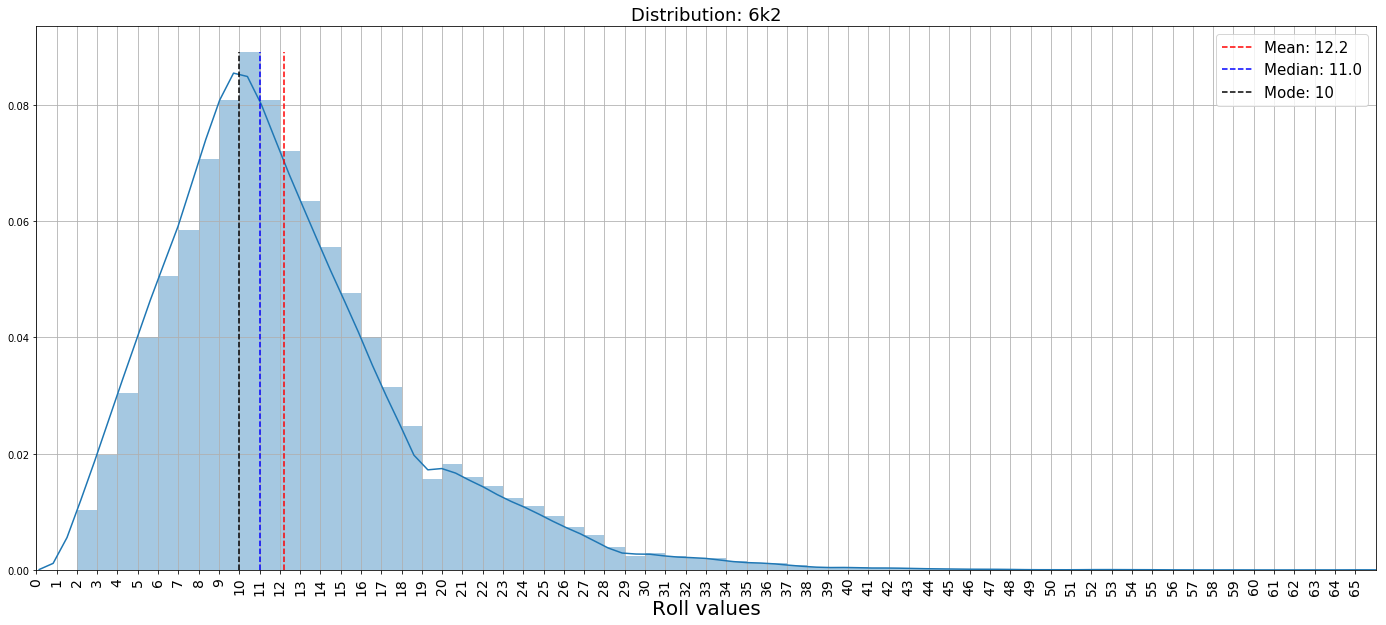

In [21]:
plot_roll(10,6,2,100000,True)

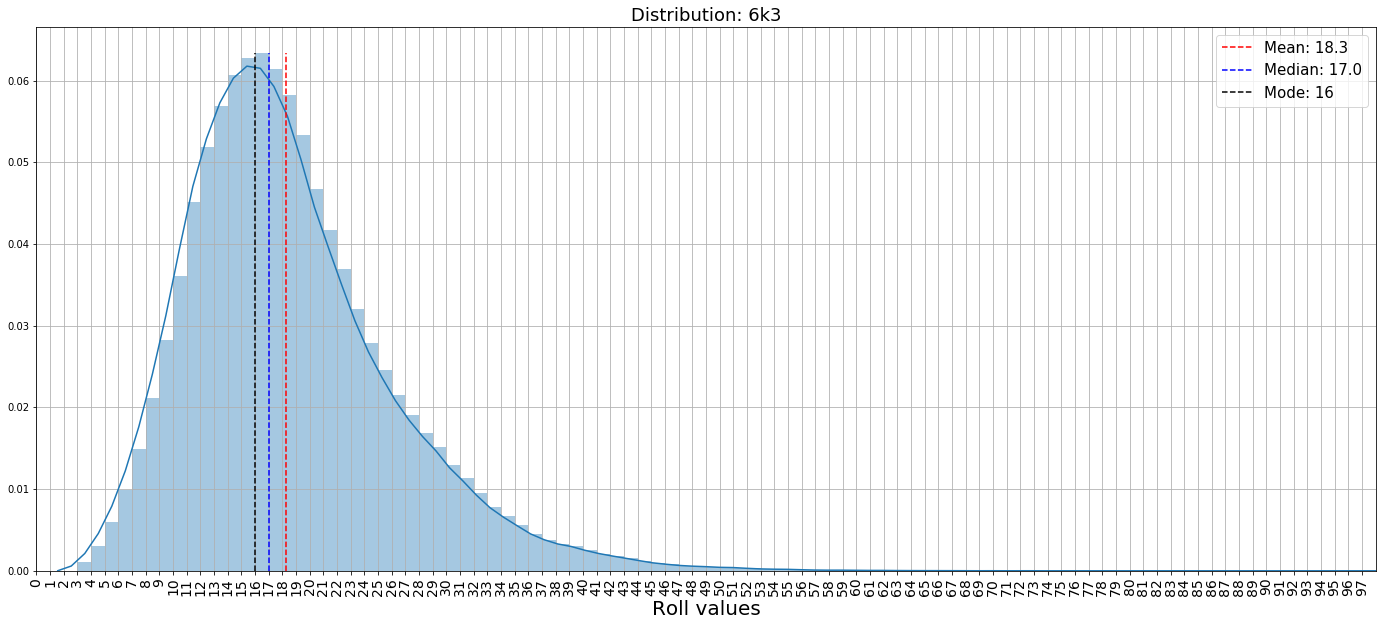

In [22]:
plot_roll(10,6,3,1000000,True)

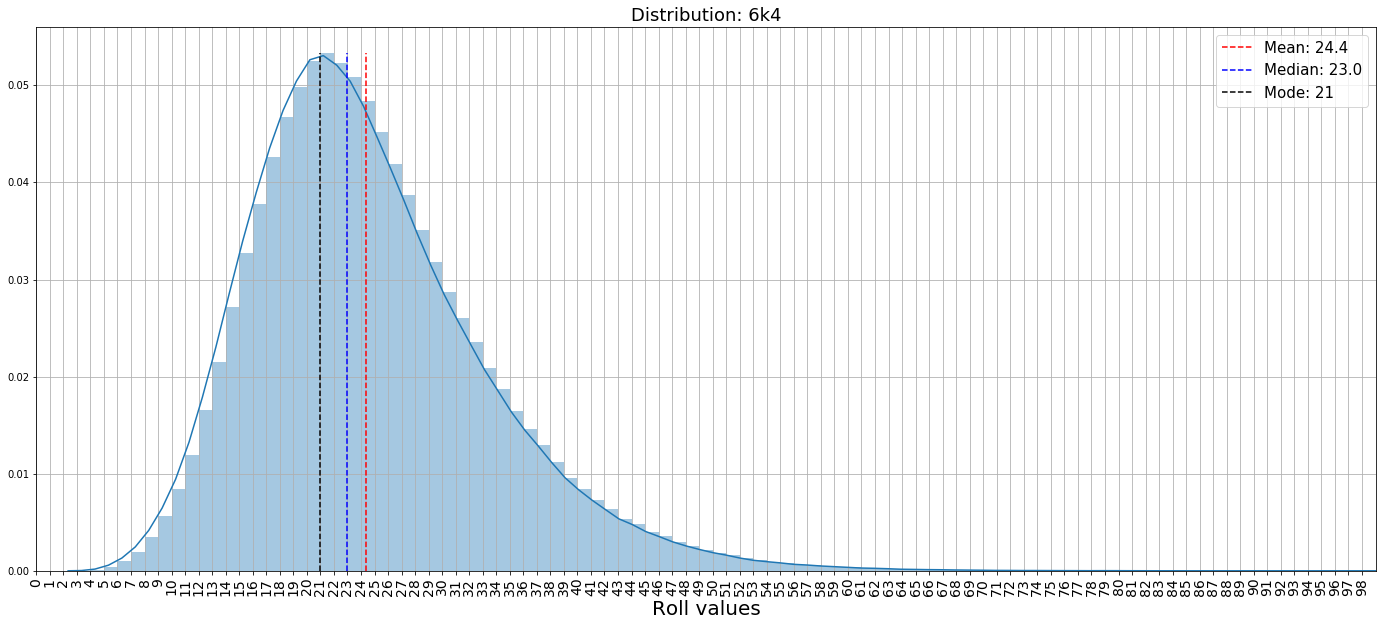

In [23]:
plot_roll(10,6,4,1000000,True)

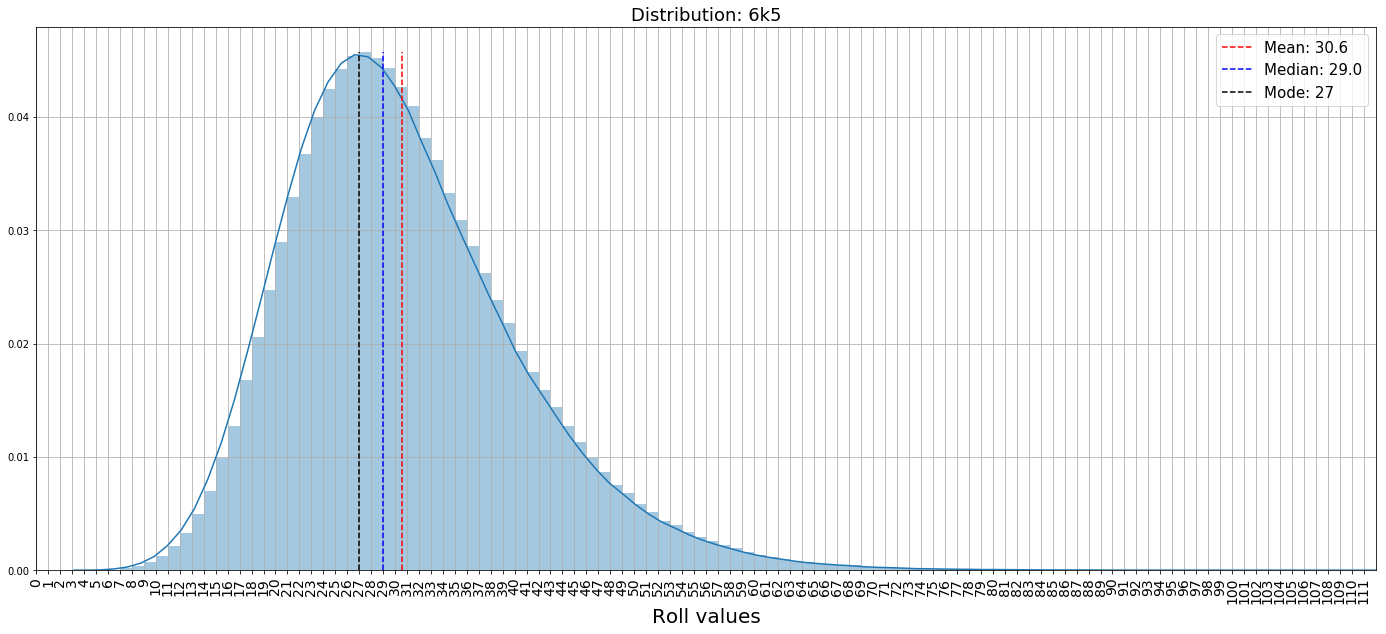

In [24]:
plot_roll(10,6,5,1000000,True)

In [25]:
def percentages_print(data):
    bounds = range(5,80,5)
    print('TN - Probability')
    for bound in bounds:
        prob = 1 - sum(i <= bound for i in data)/len(data)
        print('{} - {:.2%}'.format(bound,prob))

In [26]:
percentages_print(data)

TN - Probability
5 - 100.00%
10 - 80.00%
15 - 50.00%
20 - 0.00%
25 - 0.00%
30 - 0.00%
35 - 0.00%
40 - 0.00%
45 - 0.00%
50 - 0.00%
55 - 0.00%
60 - 0.00%
65 - 0.00%
70 - 0.00%
75 - 0.00%


In [27]:
def percentages_dict(data):
    bounds = range(5,90,5)
    data_dict = {}
    for bound in bounds:
        prob = np.round((1 - sum(i <= bound for i in data)/len(data))*100,2)
        data_dict.update({bound:prob})
    return data_dict

In [28]:
percentages_dict(roll_dist(10,5,3,True,10,100000))

{5: 99.05,
 10: 87.99,
 15: 60.12,
 20: 31.85,
 25: 15.57,
 30: 7.11,
 35: 3.0,
 40: 1.23,
 45: 0.5,
 50: 0.2,
 55: 0.08,
 60: 0.03,
 65: 0.01,
 70: 0.0,
 75: 0.0,
 80: 0.0,
 85: 0.0}

In [29]:
def percentages(data):
    bounds = range(5,90,5)
    p = []
    for bound in bounds:
        prob = np.round((1 - sum(i <= bound for i in data)/len(data))*100,2)
        p.append(prob)
    return [p]

In [30]:
matrix = percentages(roll_dist(10,5,3,True,10,100000))

In [31]:
matrix

[[98.95,
  88.04,
  59.99,
  31.95,
  15.58,
  7.08,
  2.99,
  1.26,
  0.51,
  0.21,
  0.07,
  0.03,
  0.01,
  0.01,
  0.0,
  0.0,
  0.0]]

In [32]:
def set_dataframe(lower_tn_bound,upper_tn_bound,step):
    TN = [i for i in np.arange(lower_tn_bound,upper_tn_bound,step)]
    df_xky = pd.DataFrame(columns=['TN to be hit'],data = TN)
    return df_xky

In [33]:
df_xky = set_dataframe(5,90,5)

In [34]:
df_xky

,TN to be hit
0,5
1,10
2,15
3,20
4,25
5,30
6,35
7,40
8,45
9,50


In [35]:
def make_roll_df(save_df):
    for r in range(1,11):
        for k in range(1,11):
            if k > r: break
            df_xky['{}k{}'.format(r,k)] = np.array(percentages(roll_dist(10,r,k,True,10,1000000))).T
    if save_df:
        df_xky.to_csv('roll_perc_table_xky.csv',index=False)
    return df_xky

In [83]:
make_roll_df(True)

,TN to be hit,1k1,2k1,2k2,3k1,3k2,3k3,4k1,4k2,4k3,...,10k1,10k2,10k3,10k4,10k5,10k6,10k7,10k8,10k9,10k10
0,5,49.94,49.99,90.01,49.96,90.05,99.00,50.05,90.01,98.99,...,50.09,89.99,99.00,99.95,100.00,100.00,100.00,100.00,100.00,100.00
1,10,10.03,9.99,55.01,10.00,55.06,88.00,10.00,55.05,87.97,...,10.03,55.03,88.03,97.90,99.75,99.98,100.00,100.00,100.00,100.00
2,15,5.04,4.99,22.98,5.02,23.07,60.19,5.02,23.01,60.13,...,5.01,23.02,60.17,86.96,97.02,99.50,99.93,99.99,100.00,100.00
3,20,1.01,1.00,10.01,1.01,10.02,31.89,1.01,10.00,31.92,...,1.02,10.02,31.85,63.96,86.69,96.36,99.24,99.87,99.98,100.00
4,25,0.51,0.51,3.70,0.51,3.71,15.61,0.50,3.67,15.63,...,0.51,3.68,15.54,39.02,66.98,86.71,95.92,99.00,99.81,99.97
5,30,0.10,0.10,1.47,0.10,1.44,7.02,0.10,1.44,7.07,...,0.10,1.44,7.03,21.34,44.66,69.56,87.08,95.64,98.83,99.74
6,35,0.05,0.05,0.52,0.05,0.51,2.97,0.05,0.51,2.99,...,0.05,0.50,2.97,10.78,26.72,49.42,71.91,87.48,95.50,98.67
7,40,0.01,0.01,0.19,0.01,0.19,1.24,0.01,0.19,1.24,...,0.01,0.18,1.25,5.11,14.74,31.66,53.57,73.82,87.99,95.42
8,45,0.01,0.01,0.07,0.00,0.06,0.49,0.01,0.06,0.48,...,0.01,0.06,0.48,2.32,7.60,18.73,36.37,57.04,75.71,88.43
9,50,0.00,0.00,0.02,0.00,0.02,0.20,0.00,0.02,0.20,...,0.00,0.02,0.19,1.01,3.75,10.35,22.87,40.55,60.27,77.22


---
### Make a detailed table

In [36]:
df_xky = set_dataframe(5,86,1)

In [ ]:
make_roll_df(True)